# Assignment 6 Part 2 Question 1
## (8 marks)

- Name: Kenil Shah
- Student number: V00903842

In [44]:
from qiskit import IBMQ, Aer, assemble, transpile
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister

from qiskit.visualization import plot_histogram

## Part a) (2 marks)

Write the decrementer for a 2-qubit circuit.

- $\lvert 11\rangle \rightarrow \lvert10\rangle$
- $\lvert 10\rangle \rightarrow \lvert01\rangle$
- $\lvert 01\rangle \rightarrow \lvert00\rangle$
- $\lvert 00\rangle \rightarrow \lvert11\rangle$

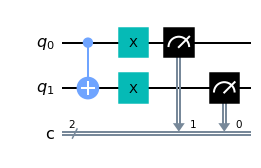

In [45]:
qcdec = QuantumCircuit(2,2)

# your code here
qcdec.cnot(0,1)
qcdec.x(0)
qcdec.x(1)

qcdec.measure([0,1], [1,0]) # do not change!
qcdec.draw('mpl')

## Part b) (6 marks)

Fill in the code to make a general $n$-qubit decrementer. Do not change the code except where it says "your code here".

Hints:
- use only multi-controlled Toffoli gates and NOT gates
- use Qiskit's built-in multi-controlled Toffoli gate
    - `qc.mcx([control_indices], target_index)`

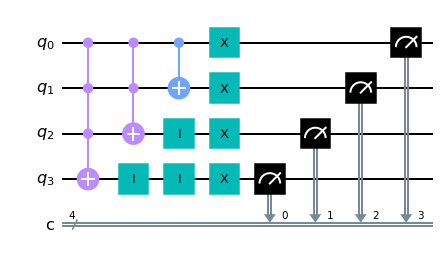

In [46]:
'''
    Args
    ------
    n: the number of qubits
'''

def decrement(n):
    qc = QuantumCircuit(n)
    
    # your code here
    control = []
    for i in range(n-1):
        control.append(i)
    
    for j in range(n-1):
        target = (n-1-j)
        qc.mcx(control[:target],target)
        if target != n-1:
            for k in range(target+1,n):
                qc.i(k)
                
    for l in range(n):
        qc.x(l)
    
    U_dec = qc.to_gate()
    U_dec.name = "U$_{dec}$"
    return U_dec

testqc = QuantumCircuit(4,4)
testqc.append(decrement(4), [0,1,2,3])
testqc.measure([3,2,1,0],[0,1,2,3])
testqc.decompose().draw('mpl')

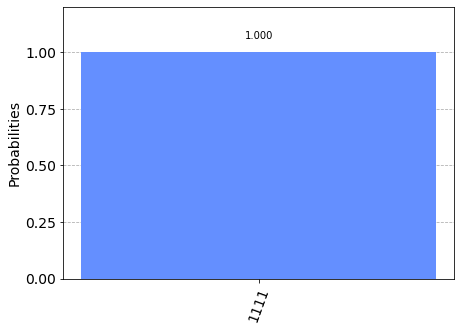

In [47]:
aer_sim = Aer.get_backend('aer_simulator')
transpiled_circuit = transpile(testqc, aer_sim)
qobj = assemble(transpiled_circuit)
results = aer_sim.run(qobj, shots=2048).result()
counts = results.get_counts()
plot_histogram(counts)

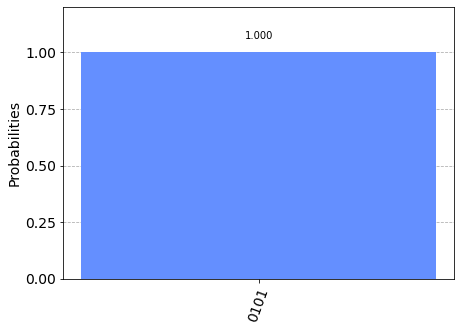

In [48]:
testqc = QuantumCircuit(4,4)
testqc.x([0,1])
testqc.append(decrement(4), [0,1,2,3])
testqc.measure([0,1,2,3],[3,2,1,0])


aer_sim = Aer.get_backend('aer_simulator')
transpiled_circuit = transpile(testqc, aer_sim)
qobj = assemble(transpiled_circuit)
results = aer_sim.run(qobj, shots=2048).result()
counts = results.get_counts()
plot_histogram(counts)